In [1]:
import pandas as pd
import autogluon as ag
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('anfis_cleaned.csv')
print(df.shape)
df.head()

(35101, 15)


,heart_rate,bp_systolic,map,resp,temp,spo2,wbc,bun,creatinine,platelets,ph,bicarbonate,chloride,sepsis_icd,patient_id
0,81.0,91.0,57.0,20.0,36.890296,97.0,12.3,59.0,2.4,142.0,7.38,19.0,109.0,1.0,951
1,80.0,87.0,58.0,21.0,36.890296,100.0,12.3,59.0,2.4,142.0,7.38,19.0,109.0,1.0,951
2,80.0,80.0,48.0,16.0,36.666667,99.0,12.3,59.0,2.4,142.0,7.38,19.0,109.0,1.0,951
3,80.0,81.0,45.0,17.0,36.666667,96.0,12.3,59.0,2.4,142.0,7.38,19.0,109.0,1.0,951
4,80.0,86.0,49.0,17.0,36.666667,97.0,12.3,59.0,2.4,142.0,7.38,19.0,109.0,1.0,951


In [3]:
fis_df = pd.read_csv('fis_cleaned.csv')
print(fis_df.shape)
fis_df.head()

(11704, 15)


,heart_rate,bp_systolic,map,resp,temp,spo2,wbc,bun,creatinine,platelets,ph,bicarbonate,chloride,sepsis_icd,patient_id
0,87.0,115.0,62.0,18.0,36.722222,96.0,17.5,44.0,3.0,246.0,7.11,22.0,108.0,1.0,361
1,83.0,87.0,51.0,18.0,36.722222,96.0,17.5,44.0,3.0,246.0,7.11,22.0,108.0,1.0,361
2,75.0,70.0,45.0,16.0,36.722222,100.0,17.5,44.0,3.0,246.0,7.11,22.0,108.0,1.0,361
3,63.0,70.0,45.0,18.0,37.444444,100.0,17.5,44.0,3.0,246.0,7.11,22.0,108.0,1.0,361
4,84.0,90.0,63.0,18.0,37.444444,98.0,17.5,44.0,3.0,246.0,7.11,22.0,108.0,1.0,361


In [4]:
X = df.drop('sepsis_icd', axis=1)
y = df['sepsis_icd']
X_features = X.drop(columns=['patient_id'])
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(X_features), columns=X_features.columns)
df_scaler['sepsis_icd'] = y

In [5]:
X_test = fis_df.drop('sepsis_icd', axis=1)
y_test = fis_df['sepsis_icd']
X_features_test = X_test.drop(columns=['patient_id'])
scaler = StandardScaler()
X_test_scaler = pd.DataFrame(scaler.fit_transform(X_features_test), columns=X_features_test.columns)
X_test_scaler['sepsis_icd'] = y_test

In [6]:
from autogluon.common import space
from autogluon.tabular import TabularPredictor

metric = 'accuracy' # we specify eval-metric just for demo (unnecessary as it's the default)
label = 'sepsis_icd'  # specifies which column do we want to predict


In [7]:
df_scaler

,heart_rate,bp_systolic,map,resp,temp,spo2,wbc,bun,creatinine,platelets,ph,bicarbonate,chloride,sepsis_icd
0,-0.372361,-1.101228,-1.212129,0.004948,8.482512e-15,-0.121281,-0.103669,1.201824,0.446078,-0.610680,0.188446,-0.732087,0.448930,1.0
1,-0.424621,-1.284761,-1.146516,0.173260,8.482512e-15,0.378788,-0.103669,1.201824,0.446078,-0.610680,0.188446,-0.732087,0.448930,1.0
2,-0.424621,-1.605944,-1.802641,-0.668299,-2.669703e-01,0.212099,-0.103669,1.201824,0.446078,-0.610680,0.188446,-0.732087,0.448930,1.0
3,-0.424621,-1.560061,-1.999479,-0.499987,-2.669703e-01,-0.287970,-0.103669,1.201824,0.446078,-0.610680,0.188446,-0.732087,0.448930,1.0
4,-0.424621,-1.330644,-1.737029,-0.499987,-2.669703e-01,-0.121281,-0.103669,1.201824,0.446078,-0.610680,0.188446,-0.732087,0.448930,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35096,-0.111060,0.137620,0.559409,-1.341547,-7.975514e-01,-0.621349,-0.987194,0.285601,-0.209863,-1.414006,0.440630,-0.315196,0.916163,0.0
35097,0.097981,0.550570,0.821859,-1.341547,-7.975514e-01,-0.788039,-0.987194,0.285601,-0.209863,-1.414006,0.440630,-0.315196,0.916163,0.0
35098,0.254762,2.064718,2.002884,-1.173235,-7.975514e-01,-0.788039,-0.987194,0.285601,-0.209863,-1.414006,0.440630,-0.315196,0.916163,0.0
35099,0.202502,1.009403,1.281147,-1.678171,-7.975514e-01,-0.788039,-0.987194,0.285601,-0.209863,-1.414006,0.440630,-0.315196,0.916163,0.0


In [8]:

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': 0.05,  # learning rate used in training (real-valued hyperparameter searched on log-scale)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 30*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}  # Refer to TabularPredictor.fit docstring for all valid values

predictor = TabularPredictor(label='sepsis_icd', eval_metric=metric).fit(
    train_data=df_scaler,  # Training features
    tuning_data=X_test_scaler,  # Validation features
    time_limit=time_limit,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    verbosity=3,
)

No model was trained during hyperparameter tuning NeuralNetTorch... Skipping this model.
Saving /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/trainer.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T1/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T2/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T3/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T4/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T5/model.pkl
Model configs that will be trained (in order):
	WeightedEnsemble_L2: 	{'ag_args': {'valid_base': False, 'name_bag_suffix': '', 'model_type': <class 'autogluon.core.models.greedy_ensemble.greedy_weighted_ensemble_model.GreedyWeightedEnsembleModel'>, 'priority': 0}, 'ag_args_e

In [9]:
predictor.leaderboard(X_test_scaler, silent=True)

Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T1/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T2/model.pkl


Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T3/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T4/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T5/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/WeightedEnsemble_L2/model.pkl


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.704887,0.704887,accuracy,0.027638,0.024809,0.725735,0.003876,0.003016,0.071124,2,True,6
1,LightGBM/T2,0.704460,0.704460,accuracy,0.013392,0.009424,0.314773,0.013392,0.009424,0.314773,1,True,2
2,LightGBM/T4,0.703093,0.703093,accuracy,0.010369,0.012370,0.339839,0.010369,0.012370,0.339839,1,True,4
3,LightGBM/T5,0.702153,0.702153,accuracy,0.013373,0.014733,0.371811,0.013373,0.014733,0.371811,1,True,5
4,LightGBM/T3,0.701897,0.701897,accuracy,0.010872,0.012587,0.398346,0.010872,0.012587,0.398346,1,True,3
5,LightGBM/T1,0.700786,0.700786,accuracy,0.013987,0.011384,0.848620,0.013987,0.011384,0.848620,1,True,1


In [15]:
from autogluon.common.utils.log_utils import set_logger_verbosity

# En ayrıntılı log seviyesine ayarlayın
set_logger_verbosity(1)


In [10]:
# TPR, FPR, TNR, FNR, F1, and ROC(AUC)
predictor.fit_summary()

Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T1/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T2/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T3/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T4/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/LightGBM/T5/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103153/models/WeightedEnsemble_L2/model.pkl


*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2   0.704887    accuracy       0.024809  0.725735                0.003016           0.071124            2       True          6
1          LightGBM/T2   0.704460    accuracy       0.009424  0.314773                0.009424           0.314773            1       True          2
2          LightGBM/T4   0.703093    accuracy       0.012370  0.339839                0.012370           0.339839            1       True          4
3          LightGBM/T5   0.702153    accuracy       0.014733  0.371811                0.014733           0.371811            1       True          5
4          LightGBM/T3   0.701897    accuracy       0.012587  0.398346                0.012587           0.398346            1       True          3
5          LightGBM/T1   0.700786    accurac

/home/honorsea/miniconda3/envs/autogluon/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T1': 0.700786056049214,
  'LightGBM/T2': 0.70446001367054,
  'LightGBM/T3': 0.7018967874231032,
  'LightGBM/T4': 0.703092959671907,
  'LightGBM/T5': 0.7021531100478469,
  'WeightedEnsemble_L2': 0.7048872180451128},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T1': ['LightGBM', 'T1'],
  'LightGBM/T2': ['LightGBM', 'T2'],
  'LightGBM/T3': ['LightGBM', 'T3'],
  'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T5': ['LightGBM', 'T5'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T1': 0.8486199378967285,
  'LightGBM/T2': 0.3147726058959961,
  'LightGBM/T3': 0.398345947265625,
  'LightGBM/T4': 0.33983874320983887,
  'LightGBM/T5': 0.3718109130859375,
  'WeightedEnsemble_L2': 0.07112383842468262},
 

In [18]:
df = df.drop(['temp', 'spo2', 'platelets', 'chloride'], axis=1)
fis_df = fis_df.drop(['temp', 'spo2', 'platelets', 'chloride'], axis=1)

In [19]:
X = df.drop('sepsis_icd', axis=1)
y = df['sepsis_icd']
X_features = X.drop(columns=['patient_id'])
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(X_features), columns=X_features.columns)
df_scaler['sepsis_icd'] = y
X_test = fis_df.drop('sepsis_icd', axis=1)
y_test = fis_df['sepsis_icd']
X_features_test = X_test.drop(columns=['patient_id'])
scaler = StandardScaler()
X_test_scaler = pd.DataFrame(scaler.fit_transform(X_features_test), columns=X_features_test.columns)
X_test_scaler['sepsis_icd'] = y_test

In [20]:
nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': 0.05,  # learning rate used in training (real-valued hyperparameter searched on log-scale)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 30*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}  # Refer to TabularPredictor.fit docstring for all valid values

predictor = TabularPredictor(label='sepsis_icd', eval_metric=metric).fit(
    train_data=df_scaler,  # Training features
    tuning_data=X_test_scaler,  # Validation features
    time_limit=time_limit,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    verbosity=3,
)

No model was trained during hyperparameter tuning NeuralNetTorch... Skipping this model.
Saving /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/trainer.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T1/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T2/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T3/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T4/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T5/model.pkl
Model configs that will be trained (in order):
	WeightedEnsemble_L2: 	{'ag_args': {'valid_base': False, 'name_bag_suffix': '', 'model_type': <class 'autogluon.core.models.greedy_ensemble.greedy_weighted_ensemble_model.GreedyWeightedEnsembleModel'>, 'priority': 0}, 'ag_args_e

In [21]:
predictor.leaderboard(X_test_scaler, silent=True)

Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T1/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T2/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T3/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T4/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T5/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/WeightedEnsemble_L2/model.pkl


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM/T4,0.713260,0.711637,accuracy,0.005607,0.012933,0.297214,0.005607,0.012933,0.297214,1,True,4
1,WeightedEnsemble_L2,0.713260,0.711637,accuracy,0.010826,0.016250,0.371780,0.005219,0.003317,0.074566,2,True,6
2,LightGBM/T2,0.706425,0.707792,accuracy,0.004134,0.011784,0.324827,0.004134,0.011784,0.324827,1,True,2
3,LightGBM/T1,0.704204,0.704887,accuracy,0.008248,0.009251,0.392894,0.008248,0.009251,0.392894,1,True,1
4,LightGBM/T5,0.702068,0.702239,accuracy,0.016253,0.008530,0.366377,0.016253,0.008530,0.366377,1,True,5
5,LightGBM/T3,0.696685,0.696941,accuracy,0.010546,0.026369,0.450371,0.010546,0.026369,0.450371,1,True,3


In [28]:
X_test_scaler

,heart_rate,bp_systolic,map,resp,wbc,bun,creatinine,ph,bicarbonate,sepsis_icd
0,-0.050858,0.001775,-0.936607,-0.341498,0.458972,0.725661,0.893895,-3.355100,-0.206690,1.0
1,-0.267468,-1.324992,-1.689141,-0.341498,0.458972,0.725661,0.893895,-3.355100,-0.206690,1.0
2,-0.700688,-2.130529,-2.099614,-0.677194,0.458972,0.725661,0.893895,-3.355100,-0.206690,1.0
3,-1.350519,-2.130529,-2.099614,-0.341498,0.458972,0.725661,0.893895,-3.355100,-0.206690,1.0
4,-0.213316,-1.182838,-0.868195,-0.341498,0.458972,0.725661,0.893895,-3.355100,-0.206690,1.0
...,...,...,...,...,...,...,...,...,...,...
11699,-0.429926,-0.566839,0.157988,1.169137,-0.009017,-1.039735,-0.487296,1.217914,-0.005484,0.0
11700,-0.484078,-0.282532,0.089576,1.336985,-0.009017,-1.039735,-0.487296,0.963858,-0.005484,0.0
11701,-0.213316,0.049160,0.705285,0.665592,-0.009017,-1.039735,-0.487296,0.963858,-0.005484,0.0
11702,-0.321621,-0.045609,0.021164,-0.341498,-0.009017,-1.039735,-0.487296,0.963858,-0.005484,0.0


Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/LightGBM/T4/model.pkl
Loading: /home/honorsea/python_projects/421/AutogluonModels/ag-20250106_103900/models/WeightedEnsemble_L2/model.pkl


Classification Report
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.71      5851
         1.0       0.71      0.72      0.71      5853

    accuracy                           0.71     11704
   macro avg       0.71      0.71      0.71     11704
weighted avg       0.71      0.71      0.71     11704

TPR (True Positive Rate):  0.7179
FPR (False Positive Rate): 0.2914
TNR (True Negative Rate):  0.7086
FNR (False Negative Rate): 0.2821
F1-Score:                  0.7146
ROC-AUC:                   0.7133


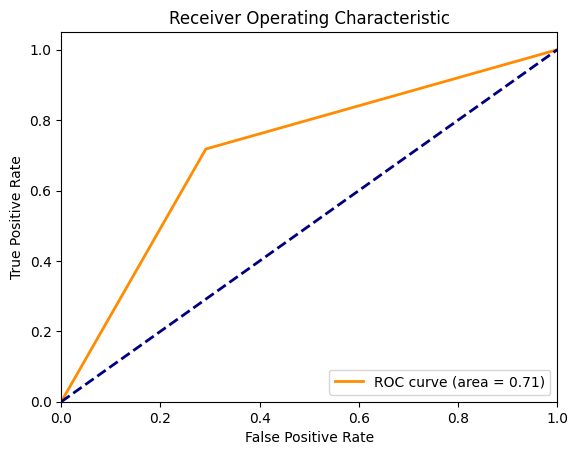

In [47]:
predictions = predictor.predict(X_test_scaler)
fis_df['predictions'] = predictions
evaluate_metrics(fis_df['sepsis_icd'], fis_df['predictions'])

Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.94      0.74       250
         1.0       0.87      0.42      0.56       250

    accuracy                           0.68       500
   macro avg       0.74      0.68      0.65       500
weighted avg       0.74      0.68      0.65       500

TPR (True Positive Rate):  0.4160
FPR (False Positive Rate): 0.0640
TNR (True Negative Rate):  0.9360
FNR (False Negative Rate): 0.5840
F1-Score:                  0.5622
ROC-AUC:                   0.6760


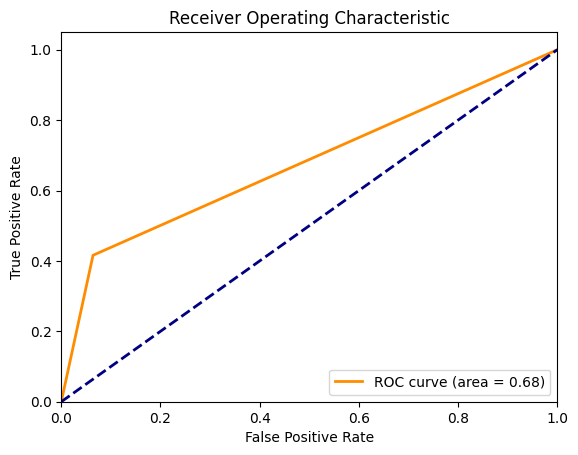

In [50]:
predictions_patient = fis_df.groupby('patient_id').agg({'sepsis_icd': 'mean', 'predictions': 'mean'})
predictions_patient.predictions = predictions_patient.predictions.astype(int)
evaluate_metrics(predictions_patient['sepsis_icd'], predictions_patient['predictions'])

In [54]:
confusion_matrix(predictions_patient['sepsis_icd'], predictions_patient['predictions'])

array([[234,  16],
       [146, 104]])

In [35]:
def accuracy_patient(df1, preds):
    df1['preds'] = preds
    preds_df = df1[['patient_id', 'sepsis_icd', 'preds']].copy()
    predictions = preds_df.groupby('patient_id').agg({'sepsis_icd': 'mean', 'preds': 'mean'})
    return predictions

In [24]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
def evaluate_metrics(y_true, preds, threshold=0.5):
    """
    Prints TPR, FPR, TNR, FNR, F1-score, and ROC-AUC values.
    
    Parameters:
    - y_true: Array-like, ground truth binary labels (0 or 1).
    - preds: Array-like, predicted probabilities or binary labels.
    - threshold: Threshold for converting probabilities to binary labels (default=0.5).
    """
    # If preds are probabilities, convert them to binary labels
    binary_preds = (preds >= threshold).astype(int)
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, binary_preds).ravel()
    
    # Calculate metrics
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate
    f1 = f1_score(y_true, binary_preds)          # F1 Score
    roc_auc = roc_auc_score(y_true, preds)      # ROC AUC Score
    
    # Print results
    print("Classification Report")
    print(classification_report(y_true, binary_preds))
    print(f"TPR (True Positive Rate):  {tpr:.4f}")
    print(f"FPR (False Positive Rate): {fpr:.4f}")
    print(f"TNR (True Negative Rate):  {tnr:.4f}")
    print(f"FNR (False Negative Rate): {fnr:.4f}")
    print(f"F1-Score:                  {f1:.4f}")
    print(f"ROC-AUC:                   {roc_auc:.4f}")
    fpr, tpr, thresholds = roc_curve(y_true, preds)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
